In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
def normalization(columns): # -1~1사이의 값으로 정규화
    MinMax = (columns - columns.min(axis=0)) / (columns.max(axis=0) - columns.min(axis=0))
    MinMax = (MinMax * 2) - 1
    MinMax
    return MinMax

In [3]:
def print_graph(MinMax, num): # num is cut range
    length = len(MinMax)
    plt.figure(figsize=(20, 5)) # graph size
    plt.xticks(np.arange(0, length+1, num))
    plt.plot(MinMax)
    plt.show()

In [4]:
def cut_count(MinMax, num, cnt): # 왼발, 오른발의 데이터를 잘라서 구분
    count = int((len(MinMax)-num) / cnt)
    step = []
    temp = 0
    for i in range(0, count):
        temp = num+i*cnt
        step.append(MinMax[temp:temp+cnt])
    return step

In [5]:
def ACF(step, cnt): #자기상관계수 구하는 함수 cnt = 한발에 들어가는 데이터의 수
    answer = 0
    acf = []
    for i in step:
        answer = 0
#         answer = np.linalg.norm(i)
        for j in i:
#             print(j)
            answer = answer + j*j
        answer = answer / cnt
#         print(answer)
        acf.append(answer)
    return acf

In [6]:
def compare_acf(acf): # 자기상관계수 값을 구해줌
    num = len(acf) / 2
    left = []
    right = []
    result = []
    avg = 0
    if (len(acf) == 2 or len(acf) == 3) :
        if (acf[0] > acf[1]):
            result = [[1.0, acf[1]/acf[0]],
                     [acf[1]/acf[0], 1.0]]
            return result
        else :
            result = [[1.0, acf[0]/acf[1]],
                     [acf[0]/acf[1], 1.0]]
            return result
    elif (len(acf) == 4 or len(acf) == 5) : 
        for i in range(1, 3):
            if (acf[i-1] > acf[i]):
                avg += acf[i]/acf[i-1]
                         
            else :
                avg += acf[i-1]/acf[i]
        result = [[1.0, avg / 2],
                  [avg/2, 1.0]]
        return result 
    elif (len(acf) % 2 == 0) :
#         print(len(acf))
        for i in range(1, len(acf), +2):
            left.append(acf[i])
            right.append(acf[i-1])
#             print(acf[i], acf[i-1])
        result = np.corrcoef(left, right)
        result = abs(result)
#         print("even", result)
    else :
        for i in range(1, len(acf)-1, +2):
            left.append(acf[i])
            right.append(acf[i-1])
#             print(acf[i], acf[i-1])
        result = np.corrcoef(left, right)
        result = abs(result)
#         print ("odd", result)
    return result

In [7]:
def seperate_z(x) :
    if (x < 0.6):
        return False
    else : return True

In [8]:
def LPF(rawData):
    rawData['targetData'] = rawData['AccY']

    ts = 0.01 # 100Hz
    tau = 0.1
#     print_graph(rawData['targetData'], 50)
#     print(rawData['targetData'])
    tmpResult = Series(np.zeros(len(rawData.targetData)))
    tmpResult[0] = rawData.targetData[0]

    for i in np.arange(1, len(rawData.targetData)):
        tmpResult[i] = (tau*tmpResult[i-1] + ts * rawData.targetData[i]) / (ts + tau)

    rawData['LPF'] = tmpResult

#     plt.plot(rawData.SampleRate, rawData.targetData, '#afafaf',  rawData.SampleRate, rawData.LPF_X, 'b')
#     plt.grid(True)
#     plt.show()
#     print(rawData)
    return rawData

In [9]:
def main(rawData, cnt):
    LPFData = LPF(rawData)
#     print(LPFData)
    MinMax = normalization(LPFData['LPF'])
#     print_graph(MinMax, 80)
    step = cut_count(MinMax, 0, cnt)
    acf = ACF(step, cnt)
    compare = compare_acf(acf)
    #     print(compare)
    result = True
    if (compare[0][1] > 0.6):
        result=  True
    else : result = False
#     if (result == True):
#         print('\033[34m', result, '\033[0m', compare[0][1])
#     else : print('\033[31m', result, '\033[0m', compare[0][1])
    return result

In [19]:
# rawData = pd.read_csv('KimGayoung/normalWalk1.csv')
# print_graph(rawData, 174)
f = open("result.csv", "w", encoding='utf-8', newline='')
wr = csv.writer(f)
for i in range(1, 201):
    cnt = 0
    for j in range(0, 10):
        rawData = pd.read_csv(f'0529Data/abnormal/abnormalWalk{j}.csv')
        result = main(rawData, i)
        if (result == False):
            cnt += 1
    wr.writerow([i,cnt*10])
    print(i, " : ", cnt*10, "%")
f.close()

1  :  0 %
2  :  0 %
3  :  0 %
4  :  0 %
5  :  0 %
6  :  0 %
7  :  10 %
8  :  30 %
9  :  30 %
10  :  30 %
11  :  60 %
12  :  80 %
13  :  100 %
14  :  100 %
15  :  100 %
16  :  100 %
17  :  100 %
18  :  80 %
19  :  70 %
20  :  100 %
21  :  100 %
22  :  70 %
23  :  60 %
24  :  100 %
25  :  100 %
26  :  90 %
27  :  90 %
28  :  70 %
29  :  70 %
30  :  100 %
31  :  100 %
32  :  90 %
33  :  100 %
34  :  90 %
35  :  70 %
36  :  80 %
37  :  70 %
38  :  60 %
39  :  60 %
40  :  100 %
41  :  100 %
42  :  100 %
43  :  100 %
44  :  90 %
45  :  90 %
46  :  100 %
47  :  90 %
48  :  90 %
49  :  100 %
50  :  100 %
51  :  90 %
52  :  60 %
53  :  40 %
54  :  60 %
55  :  40 %
56  :  10 %
57  :  20 %
58  :  30 %
59  :  40 %
60  :  60 %
61  :  80 %
62  :  90 %
63  :  80 %
64  :  90 %
65  :  100 %
66  :  100 %
67  :  90 %
68  :  70 %
69  :  70 %
70  :  80 %
71  :  80 %
72  :  80 %
73  :  90 %
74  :  80 %
75  :  80 %
76  :  80 %
77  :  70 %
78  :  60 %
79  :  40 %
80  :  50 %
81  :  70 %
82  :  70 %
83  :  80 

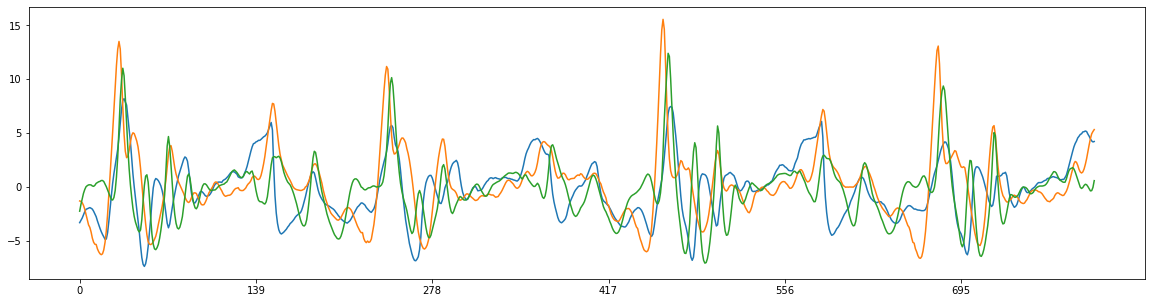

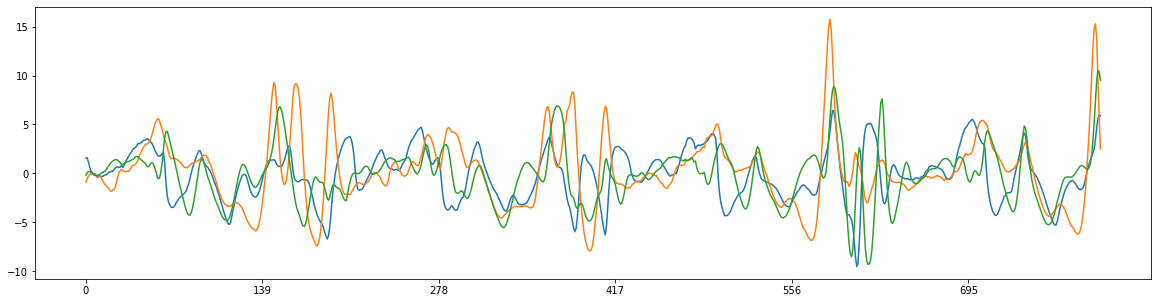

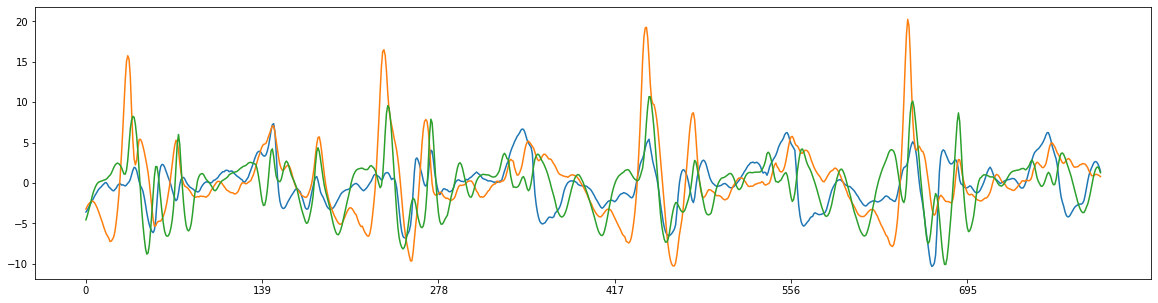

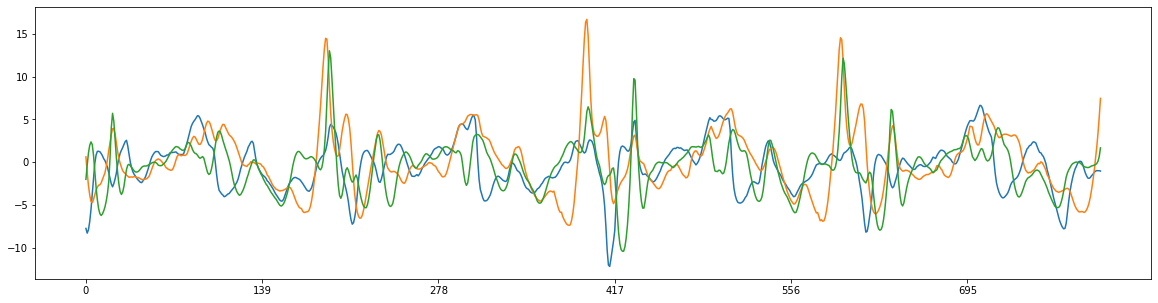

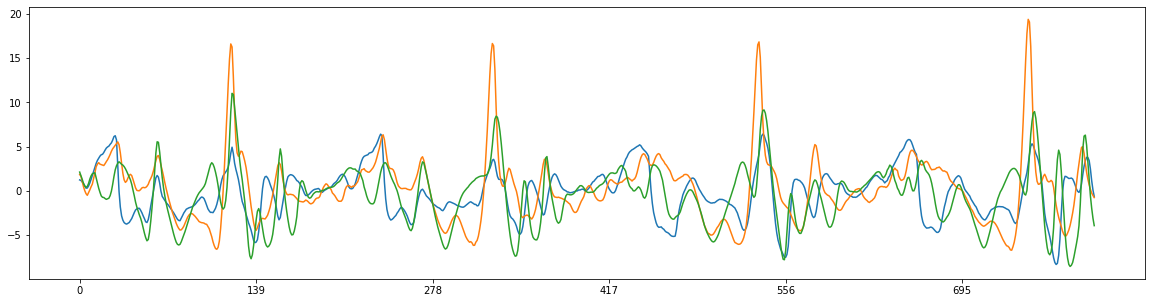

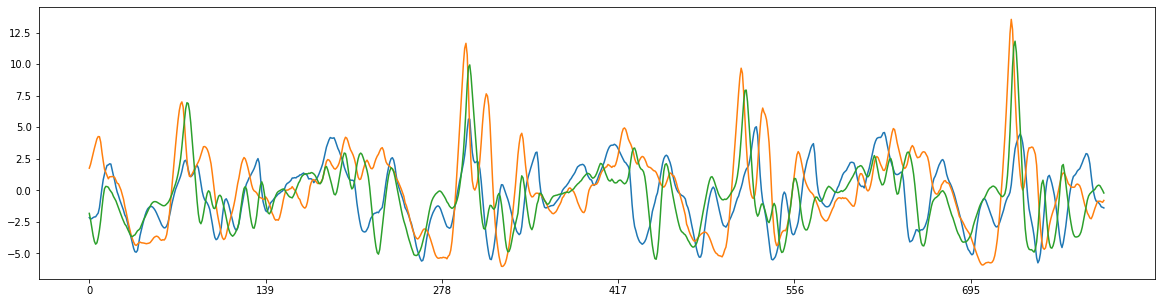

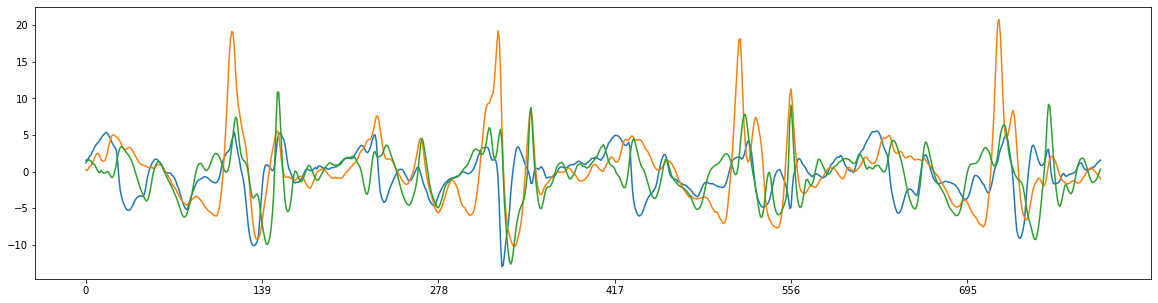

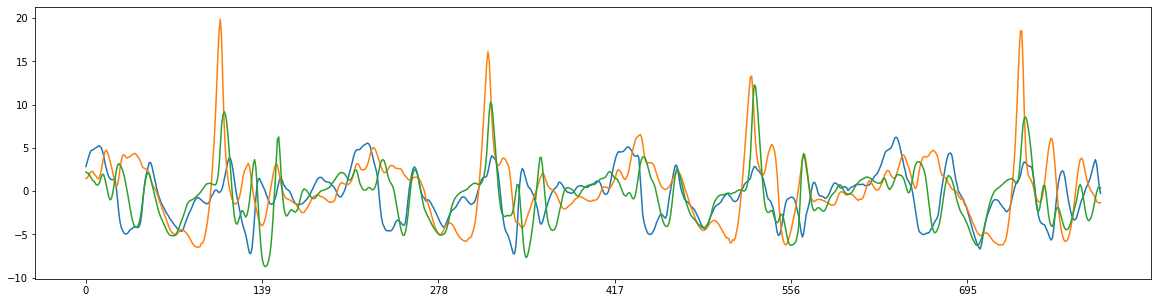

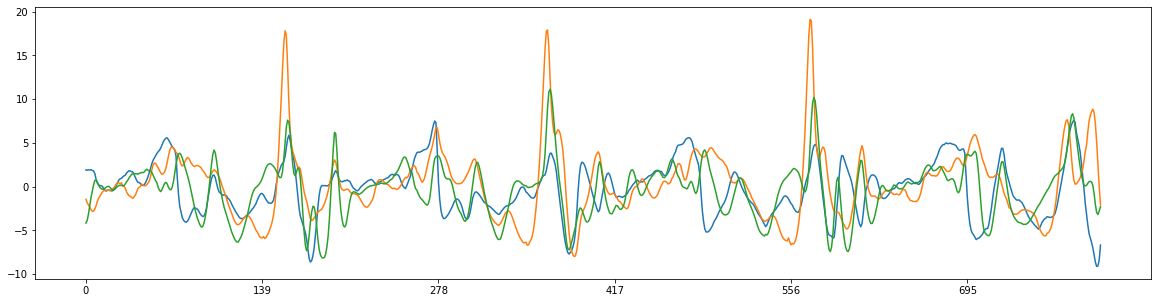

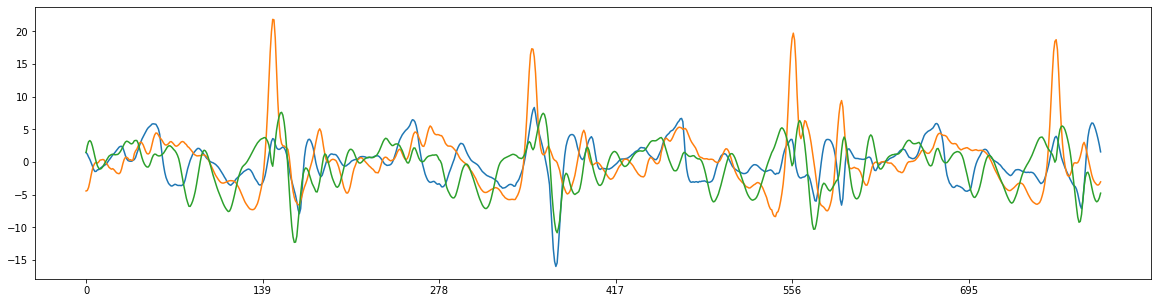

50 %


In [19]:
cnt = 0
for j in range(0, 10):
    rawData = pd.read_csv(f'0529Data/abnormal/abnormalWalk{j}.csv')
    print_graph(rawData[['AccX', 'AccY', 'AccZ']], 139)
    result = main(rawData, 139)
    if (result == True):
        cnt += 1
print(cnt*10, "%")

In [ ]:
for i in range(1, 11):
    rawData = pd.read_csv(f'0529Data/0529_user{i}/AbnoramlGait1.csv')
    print_graph()

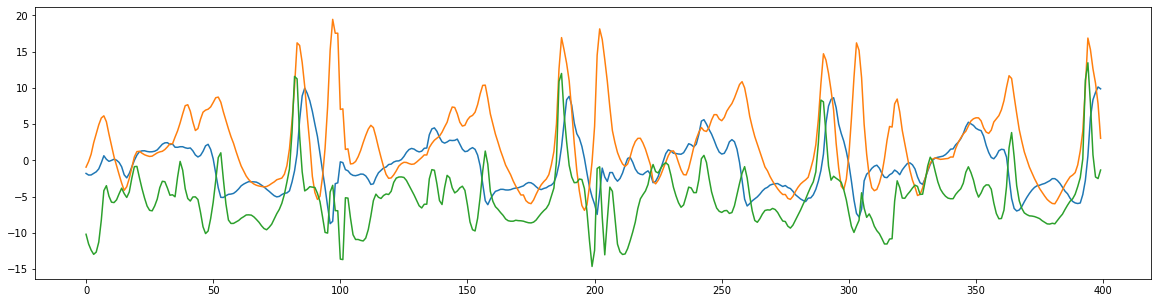

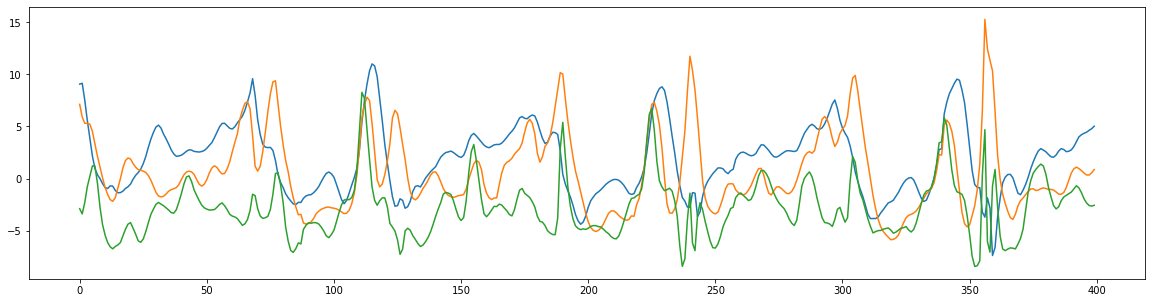

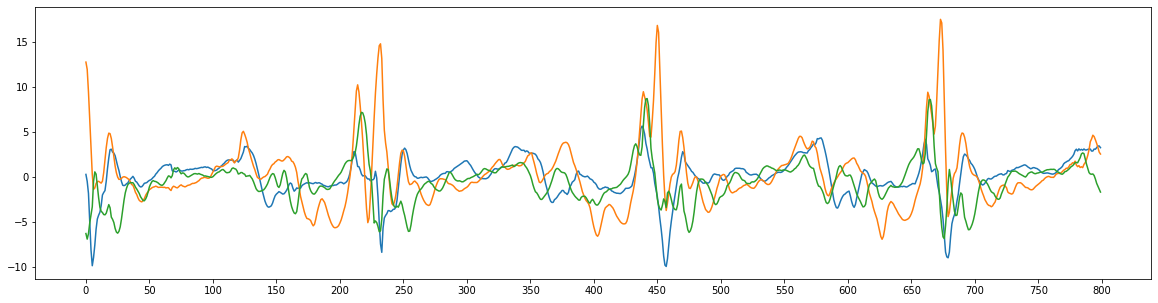

In [11]:
rawData = pd.read_csv('0529Data/0529_user1/NormalGait1.csv')
column = rawData[['AccX', 'AccY', 'AccZ']]
rawData_0 = pd.read_csv('0529Data/0529_user1/AbnormalGait1.csv')
column_0 = rawData_0[['AccX', 'AccY', 'AccZ']]
rawData_1 = pd.read_csv('0529Data/abnormal/abnormalWalk1.csv')
column_1 = rawData_1[['AccX', 'AccY', 'AccZ']]
print_graph(column, 50)
print_graph(column_0, 50)
print_graph(column_1, 50)